<a href="https://colab.research.google.com/github/auliakharis/Taxi-Hotspot-Project/blob/main/Aulia_Kharis_Individual_Project_Taxi_Hotspot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/taxi_data.zip -d /content/drive/MyDrive/taxi_data

Archive:  /content/drive/MyDrive/taxi_data.zip
   creating: /content/drive/MyDrive/taxi_data/taxi_data/
  inflating: /content/drive/MyDrive/taxi_data/taxi_data/test_hire_stats.csv  
  inflating: /content/drive/MyDrive/taxi_data/taxi_data/train_gps_points.csv  
  inflating: /content/drive/MyDrive/taxi_data/taxi_data/train_hire_stats.csv  
  inflating: /content/drive/MyDrive/taxi_data/taxi_data/zones.csv  
 extracting: /content/drive/MyDrive/taxi_data/taxi_data/zones.png  


In [ ]:
import pandas as pd
df_test = pd.read_csv("/content/drive/MyDrive/taxi_data/taxi_data/test_hire_stats.csv")
df_train = pd.read_csv("/content/drive/MyDrive/taxi_data/taxi_data/train_hire_stats.csv")
df_zones = pd.read_csv("/content/drive/MyDrive/taxi_data/taxi_data/zones.csv")
df_points = pd.read_csv("/content/drive/MyDrive/taxi_data/taxi_data/train_gps_points.csv")

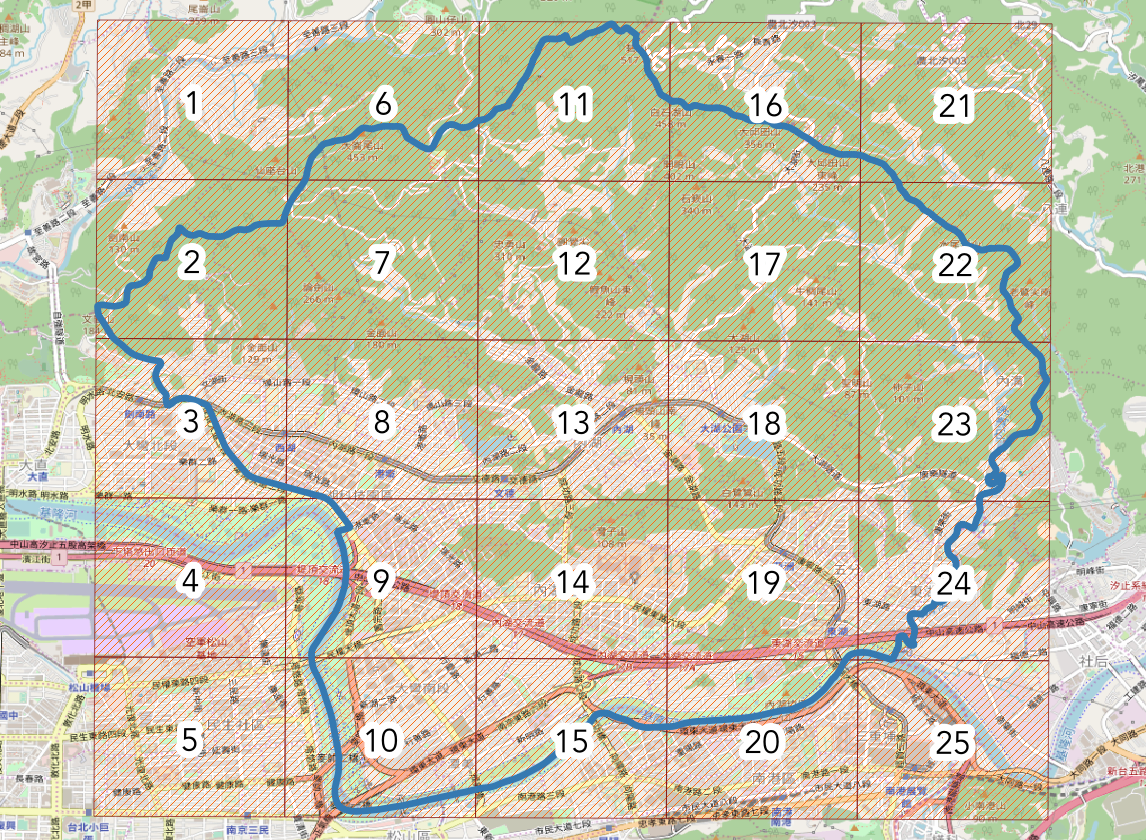

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/taxi_data/taxi_data/zones.png')

In [ ]:
df_train.head()

,Zone_ID,Date,Hour_slot,Hire_count
0,1,2016-02-01,0,0
1,1,2016-02-01,1,0
2,1,2016-02-01,2,0
3,1,2016-02-01,3,0
4,1,2016-02-01,4,0


In [ ]:
df_train["tdate"] = pd.to_datetime(df_train["Date"]).dt.date

In [ ]:
df_train.head()

,Zone_ID,Date,Hour_slot,Hire_count,tdate
0,1,2016-02-01,0,0,2016-02-01
1,1,2016-02-01,1,0,2016-02-01
2,1,2016-02-01,2,0,2016-02-01
3,1,2016-02-01,3,0,2016-02-01
4,1,2016-02-01,4,0,2016-02-01


In [ ]:
#0 == Monday
#1 == Tuesday
#2 == Wednesday
#3 == Thursday
#4 == Friday
#5 == Saturday
#6 == Sunday
df_train.iloc[10000]['tdate'].weekday()

1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
isworkday = np.ones((len(df_train),), dtype=int)
weekday = np.ones((len(df_train),), dtype=int)

In [ ]:

from datetime import datetime
for index, row in df_train.iterrows():
    dd=datetime.strptime(row['Date'], "%Y-%m-%d")
    weekday[index]= dd.weekday() 
    if weekday[index] >=5 :
        isworkday[index] = 0

In [ ]:
#Build a new dataframe from the training data
RawX = pd.DataFrame(df_train[["Zone_ID", "Hour_slot"]])
RawX['isworkday'] = isworkday
RawX['weekday'] = weekday
RawX.head()

,Zone_ID,Hour_slot,isworkday,weekday
0,1,0,1,0
1,1,1,1,0
2,1,2,1,0
3,1,3,1,0
4,1,4,1,0


In [ ]:

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.fit_transform(RawX)
enc.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6])]

In [ ]:
#Transform data into one hot vector
X = enc.transform(RawX).toarray()
X.shape

(219600, 58)

In [ ]:
#See the cooked input data
X[0:3, :]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0.]])

In [ ]:
#Resize y into (0,1)
y = df_train["Hire_count"].values/339.0
y.shape

(219600,)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=58))
model.add(Dense(units=10, activation='softmax'))
model.add(Dropout(0.1))
model.add(Dense(1))

In [ ]:
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=40, batch_size=1024, verbose=1)

Epoch 1/40
215/215 [==============================] - 2s 6ms/step - loss: 0.0231
Epoch 2/40
215/215 [==============================] - 1s 5ms/step - loss: 0.0024
Epoch 3/40
215/215 [==============================] - 1s 5ms/step - loss: 0.0016
Epoch 4/40
215/215 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 5/40
215/215 [==============================] - 1s 4ms/step - loss: 0.0012
Epoch 6/40
215/215 [==============================] - 1s 4ms/step - loss: 0.0012
Epoch 7/40
215/215 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 8/40
215/215 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 9/40
215/215 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 10/40
215/215 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 11/40
215/215 [==============================] - 1s 4ms/step - loss: 0.0010
Epoch 12/40
215/215 [==============================] - 1s 4ms/step - loss: 0.0010
Epoch 13/40
215/215 [====

In [ ]:
yhat = model.predict(X)*339.0

In [ ]:
for i in range(len(yhat)):
  if yhat[i] < 0.0:
    yhat[i] = 0.0

In [ ]:
dfhat = pd.DataFrame(yhat)
dfhat.to_csv('train_predict.csv')

In [ ]:
dfhat.head()

,0
0,0.828208
1,0.756873
2,1.156156
3,0.797479
4,0.949047


In [ ]:
df_test.shape

(6048, 5)

In [ ]:
#Declare weekday & workday
isworkday2 = np.ones((len(df_test),), dtype=int)
weekday2 = np.ones((len(df_test),), dtype=int)

In [ ]:
#Check weekday & workday
#additional holidays
holidays= {'2016-02-08', '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12','2016-02-29', '2016-04-04', '2016-04-05', '2016-06-09', '2016-06-10', 
'2016-09-15', '2016-09-16', '2016-10-10', '2017-01-02', '2017-01-27', '2017-01-30', '2017-02-01','2017-02-27', '2017-02-28'}
#additional workdays
makeupworkdays = {'2016-06-04', '2016-09-10', '2017-02-18'}
for index, row in df_test.iterrows():
    if row['Date'] in holidays:
        isworkday2[index] = 0
    else:
        dd=datetime.strptime(row['Date'], "%Y-%m-%d")
        weekday2[index]= dd.weekday() 
        if weekday2[index] >=5 and row['Date'] not in makeupworkdays:
            isworkday2[index] = 0

In [ ]:
Test = pd.DataFrame(df_test[["Zone_ID", "Hour_slot"]])
Test['isworkday'] = isworkday2
Test['weekday'] = weekday2

In [ ]:
Xtest = enc.transform(Test).toarray()
Xtest.shape

(6048, 58)

In [ ]:
yt = model.predict(Xtest)*339.0

In [ ]:
for i in range(len(yt)):
  if yt[i] < 0.0:
    yt[i] = 0.0

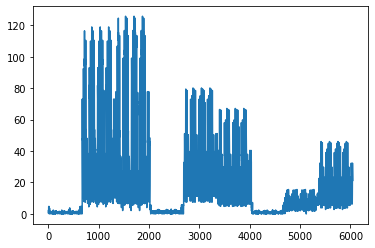

In [ ]:
plt.plot(yt)

In [ ]:
df_test['Hire_count'] = yt

In [ ]:
df_test.head()

,Test_ID,Zone_ID,Date,Hour_slot,Hire_count
0,0,7,2017-02-01,0,0.726220
1,1,7,2017-02-01,1,0.964744
2,2,7,2017-02-01,2,1.104352
3,3,7,2017-02-01,3,2.500724
4,4,7,2017-02-01,4,0.805885


In [ ]:
df_test.tail()

,Test_ID,Zone_ID,Date,Hour_slot,Hire_count
6043,6043,19,2017-02-28,19,27.987185
6044,6044,19,2017-02-28,20,25.820536
6045,6045,19,2017-02-28,21,25.144516
6046,6046,19,2017-02-28,22,22.287802
6047,6047,19,2017-02-28,23,21.320263


In [ ]:
df_test.to_csv("try.csv",index=False)